# Model Training and Evaluation

In this notebook, we train and evaluate multiple classifiers on the preprocessed Bot-IoT and TON-IoT Modbus datasets.  

We will train:
- Random Forest
- XGBoost
- LightGBM

We will evaluate models using:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix

Finally, we will compare all models in a summary table.


## Step 2: Import Required Libraries

We need libraries for:
- Data manipulation
- Model training
- Metrics evaluation
- Plotting


In [13]:
import pandas as pd
import numpy as np
import os
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix
)


import matplotlib.pyplot as plt
import seaborn as sns


import joblib
warnings.filterwarnings("ignore")


##  Load Preprocessed Dataset Splits

We will load the preprocessed `train` and `test` splits for both datasets (`Bot-IoT` and `TON-IoT-Modbus`) saved as `.npy` files.


In [14]:

splits_dir = r"C:\Users\User\IIoT_IDS_Project\data\splits"

datasets = {
    "bot-iot": {
        "X_train": r"C:\Users\User\IIoT_IDS_Project\data\splits\X_train_bot_iot.npy",
        "X_test":  r"C:\Users\User\IIoT_IDS_Project\data\splits\X_test_bot_iot.npy",
        "y_train": r"C:\Users\User\IIoT_IDS_Project\data\splits\y_train_bot_iot.npy",
        "y_test":  r"C:\Users\User\IIoT_IDS_Project\data\splits\y_test_bot_iot.npy"
    },
    "ton-iot-modbus": {
        "X_train": r"C:\Users\User\IIoT_IDS_Project\data\splits\X_train_ton_iot.npy",
        "X_test":  r"C:\Users\User\IIoT_IDS_Project\data\splits\X_test_ton_iot.npy",
        "y_train": r"C:\Users\User\IIoT_IDS_Project\data\splits\y_train_ton_iot.npy",
        "y_test":  r"C:\Users\User\IIoT_IDS_Project\data\splits\y_test_ton_iot.npy"
    }
}


## Define Models

We define three classifiers to train:
- Random Forest
- XGBoost
- LightGBM


In [15]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}


## Train and Evaluate Each Model

For each dataset and each model:
1. Train the model on training data
2. Predict on test data
3. Calculate metrics: Accuracy, Precision, Recall, F1-score
4. Display Classification Report
5. Plot Confusion Matrix
6. Save trained model
7. Store metrics for summary table




=== Dataset: bot-iot ===

--- Model: RandomForest ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00    586890

    accuracy                           1.00    586964
   macro avg       1.00      1.00      1.00    586964
weighted avg       1.00      1.00      1.00    586964



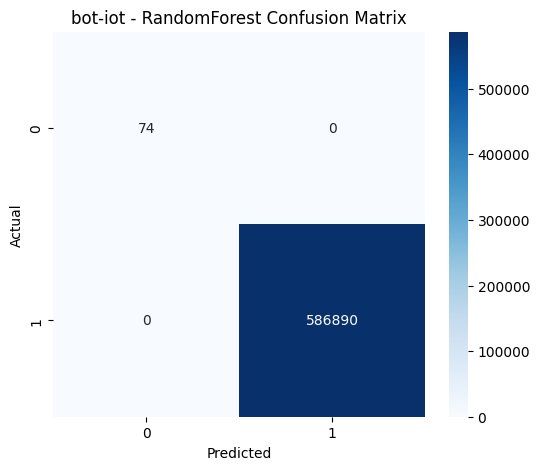


--- Model: XGBoost ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        74
           1       1.00      1.00      1.00    586890

    accuracy                           1.00    586964
   macro avg       0.99      1.00      1.00    586964
weighted avg       1.00      1.00      1.00    586964



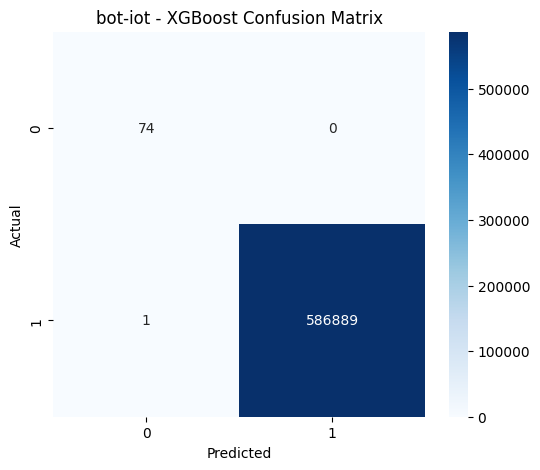


--- Model: LightGBM ---
[LightGBM] [Info] Number of positive: 2347557, number of negative: 2347557
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2636
[LightGBM] [Info] Number of data points in the train set: 4695114, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

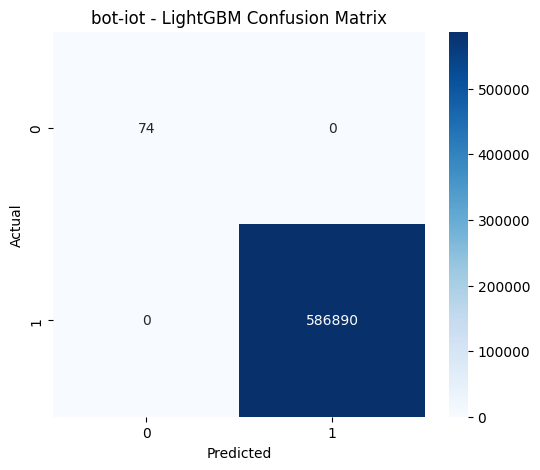



=== Dataset: ton-iot-modbus ===

--- Model: RandomForest ---
Accuracy:  0.9846
Precision: 0.9848
Recall:    0.9846
F1-score:  0.9846

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3000
           1       0.99      0.98      0.98      3222

    accuracy                           0.98      6222
   macro avg       0.98      0.98      0.98      6222
weighted avg       0.98      0.98      0.98      6222



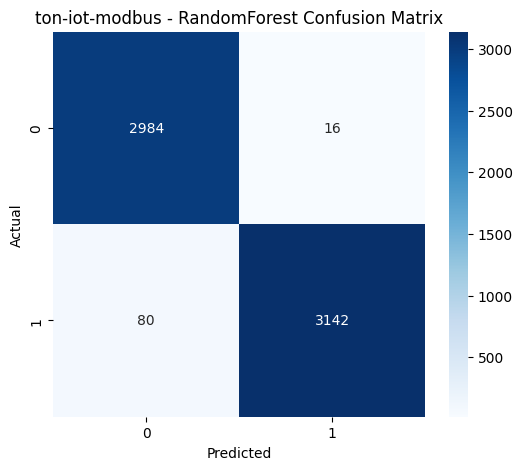


--- Model: XGBoost ---
Accuracy:  0.8248
Precision: 0.8248
Recall:    0.8248
F1-score:  0.8247

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      3000
           1       0.82      0.84      0.83      3222

    accuracy                           0.82      6222
   macro avg       0.82      0.82      0.82      6222
weighted avg       0.82      0.82      0.82      6222



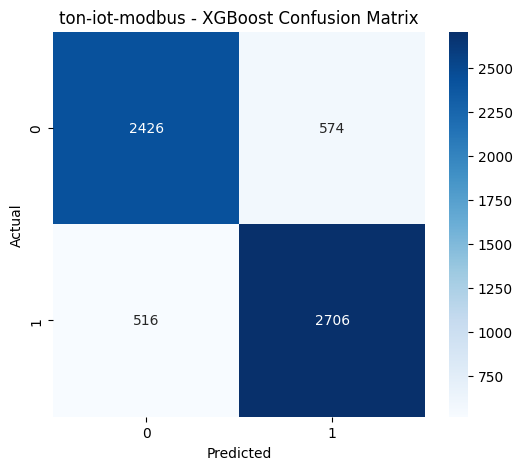


--- Model: LightGBM ---
[LightGBM] [Info] Number of positive: 12884, number of negative: 12000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 24884, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517762 -> initscore=0.071080
[LightGBM] [Info] Start training from score 0.071080
Accuracy:  0.7493
Precision: 0.7538
Recall:    0.7493
F1-score:  0.7471

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.66      0.72      3000
           1       0.73      0.83      0.77      3222

    accuracy                           0.75      6222
   macro avg       0.75      0.75      0.75      6222
weighted avg       0.75      0.75      0.75      6222



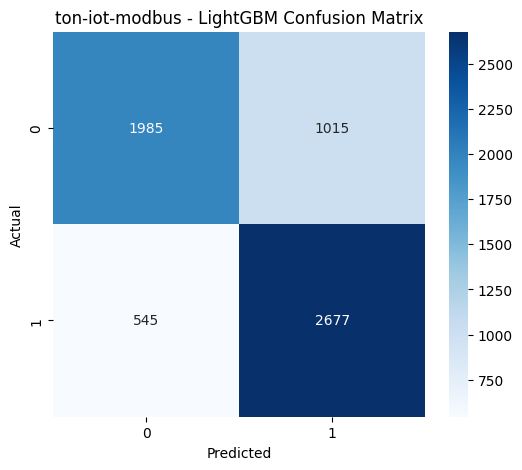

In [16]:
summary_results = []

for dataset_name, paths in datasets.items():
    print(f"\n\n=== Dataset: {dataset_name} ===")

    # Load preprocessed data
    X_train = np.load(paths["X_train"])
    X_test = np.load(paths["X_test"])
    y_train = np.load(paths["y_train"], allow_pickle=True)
    y_test = np.load(paths["y_test"], allow_pickle=True)

    for model_name, model in models.items():
        print(f"\n--- Model: {model_name} ---")

        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
        rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
        f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

        # Print results
        print(f"Accuracy:  {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall:    {rec:.4f}")
        print(f"F1-score:  {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, zero_division=0))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"{dataset_name} - {model_name} Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

        # Save trained model
        model_dir = r"C:\Users\User\IIoT_IDS_Project\models"
        os.makedirs(model_dir, exist_ok=True)
        joblib.dump(model, os.path.join(model_dir, f"{dataset_name}_{model_name}.joblib"))

        # Save metrics
        summary_results.append({
            "Dataset": dataset_name,
            "Model": model_name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-score": f1
        })


## Summary Table

We display a summary table of metrics for all models and datasets for easy comparison.


In [17]:
summary_df = pd.DataFrame(summary_results)
display(summary_df)


,Dataset,Model,Accuracy,Precision,Recall,F1-score
0,bot-iot,RandomForest,1.000000,1.000000,1.000000,1.000000
1,bot-iot,XGBoost,0.999998,0.999998,0.999998,0.999998
2,bot-iot,LightGBM,1.000000,1.000000,1.000000,1.000000
3,ton-iot-modbus,RandomForest,0.984571,0.984787,0.984571,0.984575
4,ton-iot-modbus,XGBoost,0.824815,0.824812,0.824815,0.824742
5,ton-iot-modbus,LightGBM,0.749277,0.753772,0.749277,0.747144


## Bar Chart Comparison

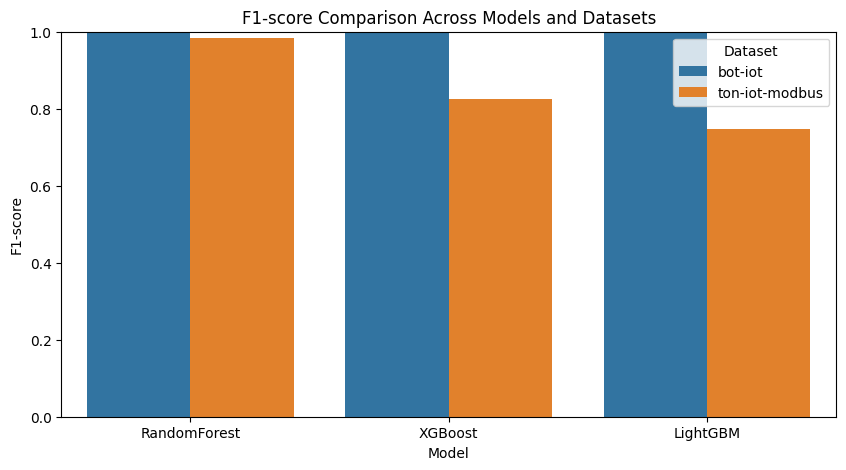

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="F1-score", hue="Dataset", data=summary_df)
plt.title("F1-score Comparison Across Models and Datasets")
plt.ylim(0,1)
plt.show()